In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Data**

In [55]:
df = pd.read_csv('/content/TSPCB_AQI_Site names and location details As on 1st November 2023.csv')

In [56]:
df.head

<bound method NDFrame.head of                              Site Name Pollution Board       City   Latitude  \
0                           ECIL Kapra           TSPCB  Hyderabad  17.470358   
1                      Nacharam  IALA            TSPCB  Hyderabad  17.429348   
2               Louis Braille Malakpet           TSPCB  Hyderabad  17.372073   
3               Khairthabad RTO office           TSPCB  Hyderabad  17.417116   
4                            Kompally            TSPCB  Hyderabad  17.544866   
5               Kokapet Community Hall           TSPCB  Hyderabad  17.393563   
6               Symphony Park RC Puram           TSPCB  Hyderabad  17.528552   
7                       IIT Hyderabad            TSPCB  Hyderabad  17.585670   
8                     IDA Pashamylaram           TSPCB  Hyderabad  17.527465   
9             Bollaram Industrial Area           TSPCB  Hyderabad  17.540891   
10                  ICRISAT Patancheru           TSPCB  Hyderabad  17.514423   
11  Hydera

**Data Cleaning**

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Site Name        14 non-null     object 
 1   Pollution Board  14 non-null     object 
 2   City             14 non-null     object 
 3   Latitude         14 non-null     float64
 4   Longitude        14 non-null     float64
dtypes: float64(2), object(3)
memory usage: 688.0+ bytes


In [58]:
df.shape

(14, 5)

In [59]:
df.isnull().sum()

Site Name          0
Pollution Board    0
City               0
Latitude           0
Longitude          0
dtype: int64

In [60]:
df.columns

Index(['Site Name', 'Pollution Board', 'City', 'Latitude', 'Longitude'], dtype='object')

<ipython-input-61-9f77eebad9e6>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Longitude', y='Latitude', palette='Set1')


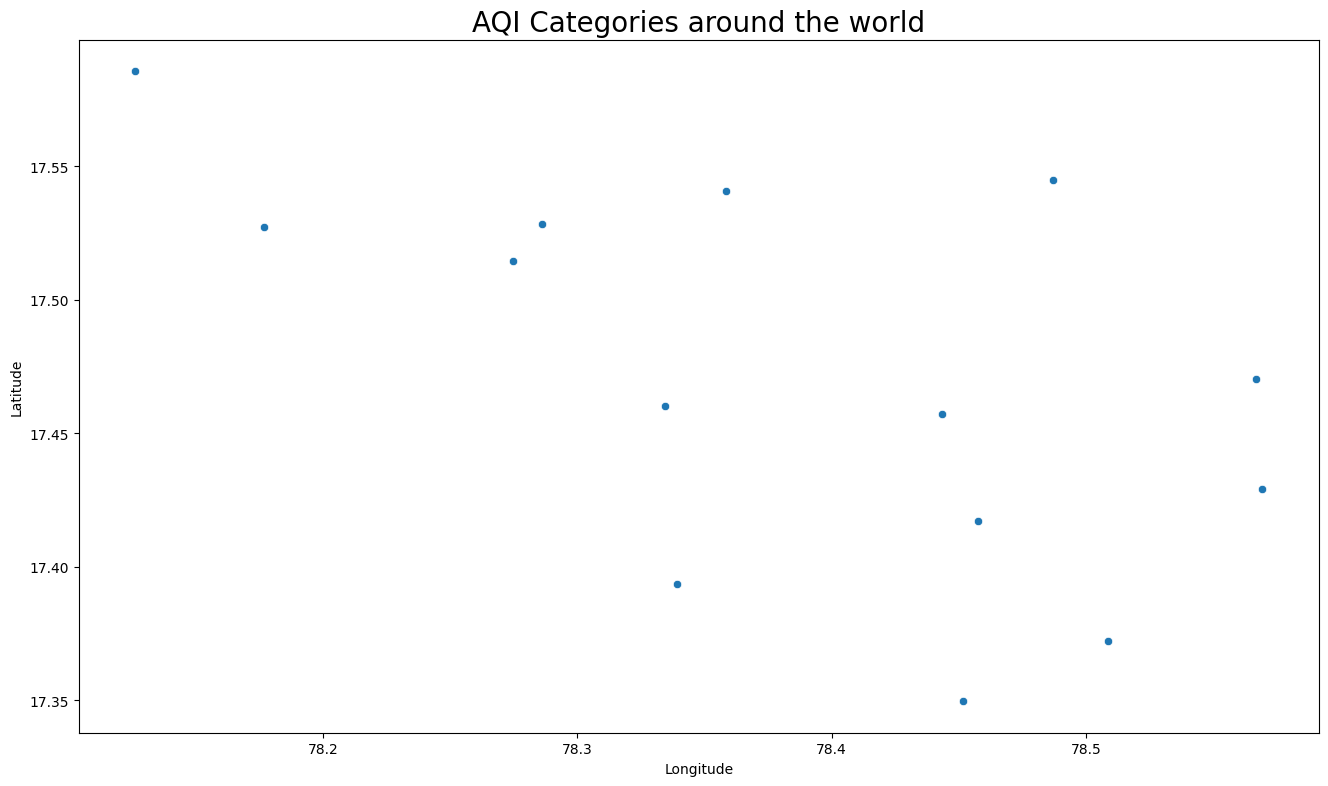

In [61]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='Longitude', y='Latitude', palette='Set1')
plt.title('AQI Categories around the world', fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [62]:
df = df.drop(['Latitude','Longitude'],axis=1)

In [63]:
df.head()

,Site Name,Pollution Board,City
0,ECIL Kapra,TSPCB,Hyderabad
1,Nacharam IALA,TSPCB,Hyderabad
2,Louis Braille Malakpet,TSPCB,Hyderabad
3,Khairthabad RTO office,TSPCB,Hyderabad
4,Kompally,TSPCB,Hyderabad


In [64]:
df['Site Name'].unique()

array(['ECIL Kapra', 'Nacharam  IALA ', 'Louis Braille Malakpet',
       'Khairthabad RTO office', 'Kompally ', 'Kokapet Community Hall',
       'Symphony Park RC Puram', 'IIT Hyderabad ', 'IDA Pashamylaram',
       'Bollaram Industrial Area', 'ICRISAT Patancheru',
       'Hyderabad Central University (HCU)', 'Sanathnagar', 'ZOO Park'],
      dtype=object)

In [65]:
df['Pollution Board'].unique()

array(['TSPCB'], dtype=object)

In [66]:
df['City'].unique()

array(['Hyderabad'], dtype=object)

**Encoding**

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
LE = LabelEncoder()

In [69]:
df['Site Name'] = LE.fit_transform(df['Site Name'])

In [70]:
df['Pollution Board'] = LE.fit_transform(df['Pollution Board'])

In [71]:
df['City'] = LE.fit_transform(df['City'])

In [72]:
df.head()

,Site Name,Pollution Board,City
0,1,0,0
1,10,0,0
2,9,0,0
3,6,0,0
4,8,0,0


**Data Visualization**

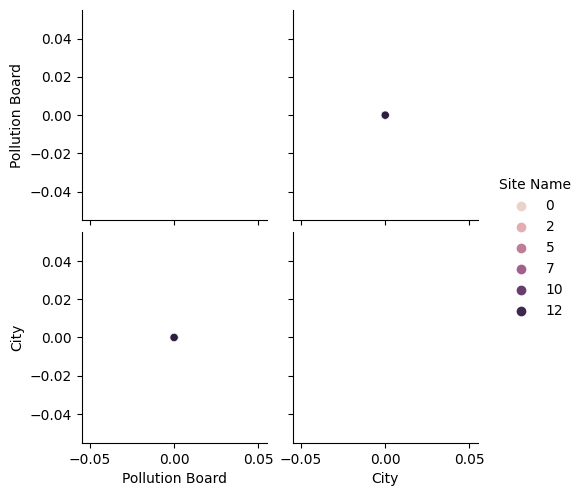

In [73]:
sns.pairplot(df,hue='Site Name')
plt.show()

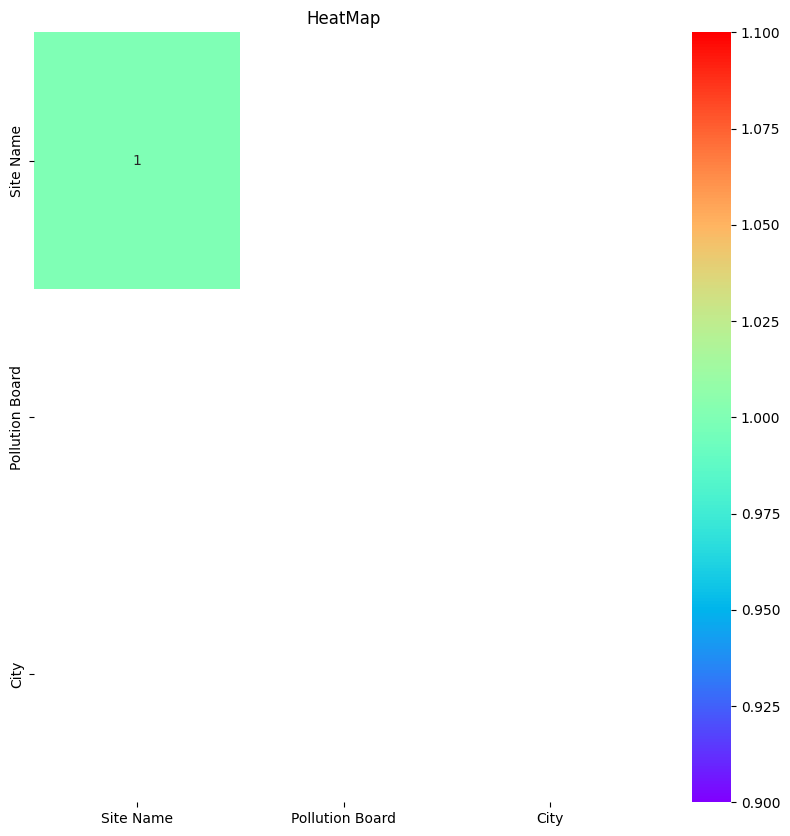

In [74]:
Corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(Corr,annot=True,cmap='rainbow')
plt.title('HeatMap')
plt.show()

**Train & Test Split**

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df.drop(columns='Site Name',axis=1)
X

,Pollution Board,City
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [77]:
y = df['Site Name']
y

0      1
1     10
2      9
3      6
4      8
5      7
6     12
7      5
8      4
9      0
10     3
11     2
12    11
13    13
Name: Site Name, dtype: int64

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Scaling**

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
SD = StandardScaler()

In [81]:
X_train_SD = SD.fit_transform(X_train)

In [82]:
X_test_SD = SD.transform(X_test)

**KNN Classifier & Gridsearchcv**

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
KNN = KNeighborsClassifier()

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
para ={
    'n_neighbors' : range(1,40)
}

In [87]:
GD = GridSearchCV(KNN,param_grid=para,scoring='accuracy',cv=10)

In [88]:
KNN = KNeighborsClassifier(n_neighbors=3)

In [89]:
KNN.fit(X_train_SD, y_train)

KNeighborsClassifier(n_neighbors=3)

**Prediction**

In [90]:
y_hat = KNN.predict(X_test_SD)

**Model Evaluation**

In [91]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [92]:
print(accuracy_score(y_test,y_hat))

0.0


In [93]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [94]:
print(confusion_matrix(y_test,y_hat))

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 0]]
